In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("loan.csv", low_memory=False)
data_dict = pd.read_excel("Data_Dictionary.xlsx")

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

There are lots of columns containing only null values we need to remove those columns

In [5]:
df_filtered = df.dropna(axis=1,how='all')

In [6]:
print("Shape of Original Dataset : ", df.shape)
print("Shape of filtered Dataset : ", df_filtered.shape)

Shape of Original Dataset :  (39717, 111)
Shape of filtered Dataset :  (39717, 57)


In [7]:
df_filtered.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

There are lots of columns containing null values more than 50% of the total so we can set a threshold and remove those columns.

In [8]:
threshold = len(df_filtered)/2

In [9]:
df_filtered = df_filtered.dropna(thresh = threshold, axis = 1)

In [10]:
df_filtered.shape

(39717, 54)

In [11]:
df_filtered.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Some columns contain only single constant value throughout the dataset. There is no variance in those columns and it will not do anything for the target variables. So we can remove those columns

In [12]:
cols_to_drop = []
df_unique = df_filtered.nunique()
const_cols = df_unique[df_unique.values == 1].index
cols_to_drop.extend(const_cols)

In [13]:
print(cols_to_drop)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


Some of the columns contain information after approving the loan application. Here our objective is to identify the factors affecting the loan application. So these columns wont have any affect on the analysis.
* id, and member_id are unique for everyone so there is no need of that.
* desc column contains the description of reason for the loan. 
* url, and zip_code contains only partial information.
* All other columns are those created after the loan is approved

In [14]:
cols_to_drop.extend(["id","member_id","url","desc","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"])
cols_to_drop

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens',
 'id',
 'member_id',
 'url',
 'desc',
 'zip_code',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d']

In [15]:
df_filtered = df_filtered.drop(cols_to_drop, axis=1)
df_filtered.shape

(39717, 28)

In [16]:
df_filtered.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [17]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [18]:
df_filtered.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,17.94,0,Jan-96,0,15,0,27783,53.90%,38,0.0


In [19]:
df_filtered.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


We can start analysing the columns one by one and check whether there is any formatting to be done on the columns.

We can start with the loan_status column since it is the target columns.

In [20]:
df_filtered["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

The loan_status column contains three values 
* Fully Paid - The loan has been paid.
* Charged Off - The loan has not been paid (default).
* Current - Currently paying the loan (may or may not pay the loan completely).

In [21]:
df_filtered.index[df["loan_status"]=="Current"]

Int64Index([    4,    32,    39,    86,    95,    99,   101,   184,   217,
              218,
            ...
            15544, 15617, 15618, 15711, 15901, 15972, 15981, 16361, 16609,
            18215],
           dtype='int64', length=1140)

In [22]:
df_filtered = df_filtered[df_filtered.loan_status != "Current"]

In [23]:
df_filtered.shape

(38577, 28)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_filtered["loan_status"]= le.fit_transform(df_filtered["loan_status"])
df_filtered["loan_status"].head()

0    1
1    0
2    1
3    1
5    1
Name: loan_status, dtype: int32

In [25]:
# numerical variables
df_num = df_filtered.select_dtypes(include='number')
print(df_num.shape[1])

# categorical variables
df_cat = df_filtered.select_dtypes(include=['object','category'])
print(df_cat.shape[1])

14
14


In [29]:
df_filtered.int_rate = pd.to_numeric(df_filtered.int_rate.apply(lambda x : x.split('%')[0]))
#creating bins for int_rate,open_acc,revol_util,total_acc
df_filtered['int_rate_groups'] = pd.cut(df_filtered['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
df_filtered['loan_amnt_groups'] = pd.cut(df_filtered['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df_filtered['annual_inc_groups'] = pd.cut(df_filtered['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [30]:
df_filtered.sub_grade = pd.to_numeric(df_filtered.sub_grade.apply(lambda x : x[-1]))
df_filtered.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

# Univariate Analysis

Text(0.5, 1.0, 'Grade vs Chargedoff')

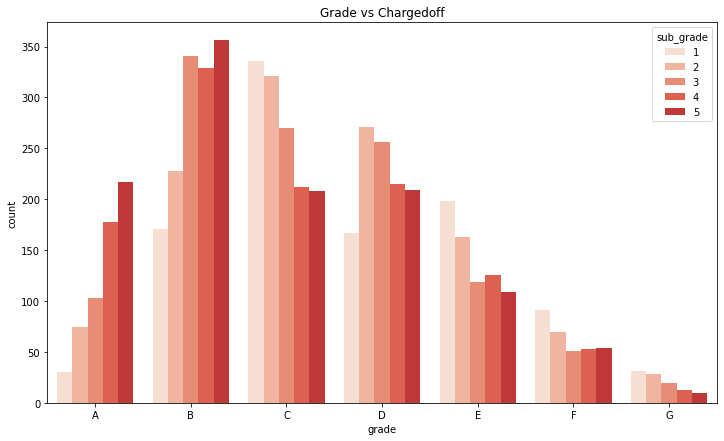

In [31]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette("Reds")
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , 
              hue = 'sub_grade',data = df_filtered[df_filtered.loan_status == 0])
plt.title("Grade vs Chargedoff")

In [32]:
df_filtered.loan_status.value_counts()

1    32950
0     5627
Name: loan_status, dtype: int64

#### Analyzing purpose

<AxesSubplot:xlabel='count', ylabel='purpose'>

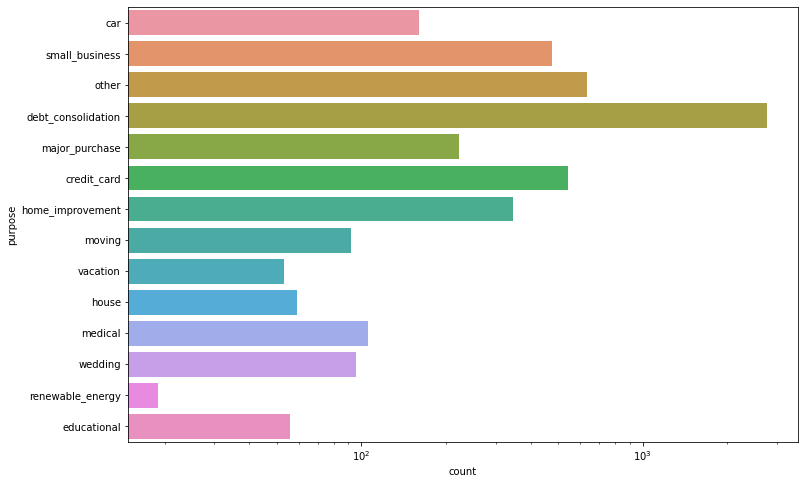

In [48]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=df_filtered[df_filtered.loan_status == 0])

<AxesSubplot:xlabel='grade', ylabel='count'>

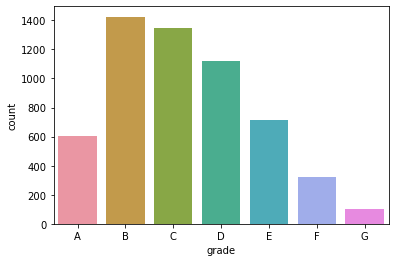

In [33]:
sns.countplot(x = 'grade', data = df_filtered[df_filtered.loan_status == 0], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

* Loans with grade B are more likely to be defaulted

Analyzing home_ownership

In [35]:
#checking unique values for home_ownership
df_filtered['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [36]:
df_filtered['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [37]:

#replacing 'NONE' with 'OTHERS'
df_filtered['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

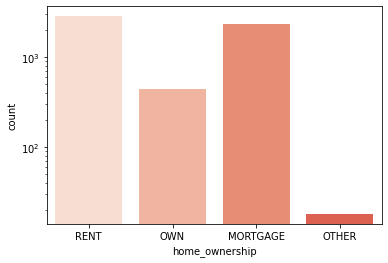

In [38]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=df_filtered[df_filtered['loan_status']==0])

People with home_ownership Rent and Mortage are more likely to be defaulted.

In [40]:
## Extracting month and year
df_month_year = df_filtered['issue_d'].str.partition("-", True)     
df_filtered['issue_month']=df_month_year[0]                       
df_filtered['issue_year']='20' + df_month_year[2]

<AxesSubplot:xlabel='issue_year', ylabel='count'>

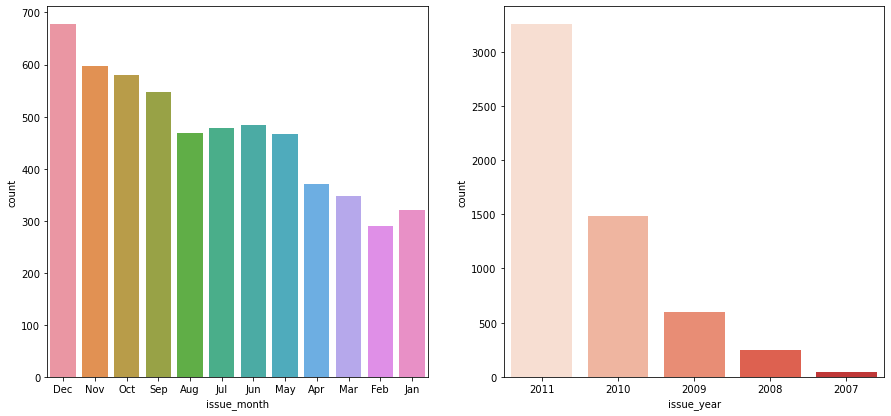

In [41]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=df_filtered[df_filtered['loan_status']==0])
plt.subplot(222)
sns.countplot(x='issue_year', data=df_filtered[df_filtered['loan_status']==0])

The loan issued in december and in year 2011 are more likely to be defaulted.
We can findout whether there is any problem in the year 2011.

# Bivariate Analysis

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

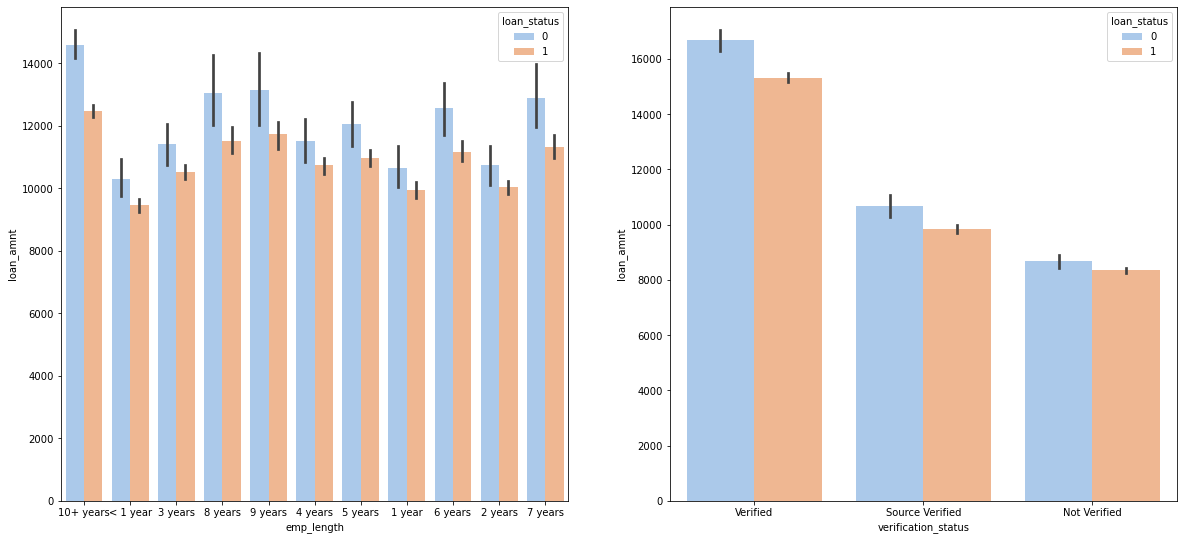

In [51]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =df_filtered,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =df_filtered,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

* Employees with 10+years of experience have more amount of loan approved.
* verified loan applications tend to have higher loan amount.


#### grade vs interest rate

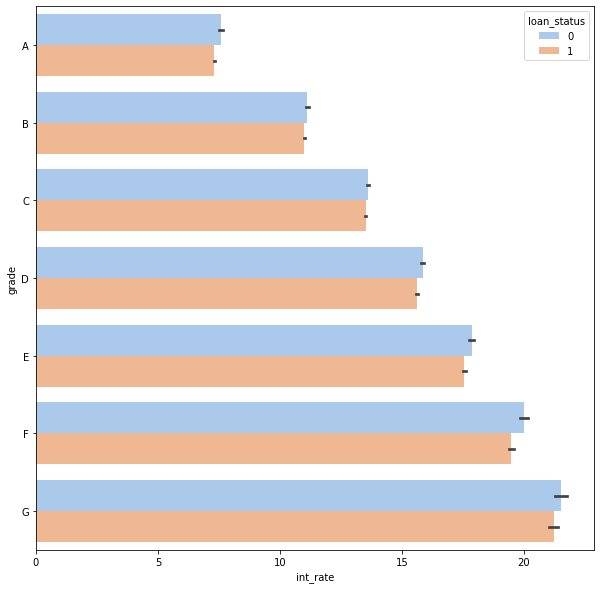

In [44]:
#df_filtered.int_rate = pd.to_numeric(df_filtered.int_rate.apply(lambda x : x.split('%')[0]))
plt.figure(figsize=(10,10))
sns.barplot(data =df_filtered,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

The loans with grade G is more likely to be defaulted.

<Figure size 432x288 with 0 Axes>

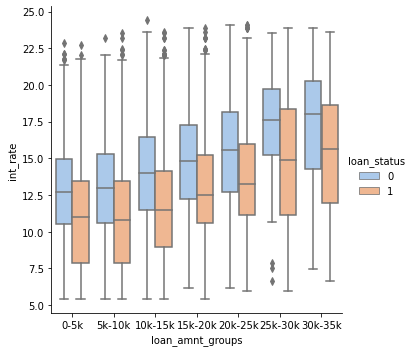

In [45]:

# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =df_filtered,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

* The interest rate is high for the loans that are defaulted. 
* This can be a pretty strong driving factor for loan defaulting.

<AxesSubplot:xlabel='purpose', ylabel='loan_amnt'>

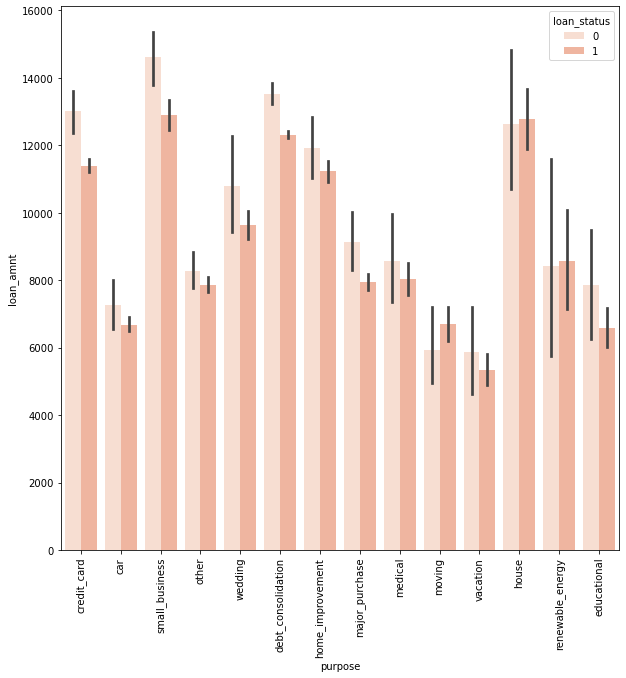

In [50]:
fig = plt.figure(figsize = (10, 10))
plt.xticks(rotation=90)
sns.barplot(x='purpose', y='loan_amnt', data=df_filtered, hue="loan_status")

## Insights

#### By analyzing the graphs we can find that there is more probability of defaulting when:

* Applicants who have Home_ownership as RENT, and Mortage.
* Applicants who use the loan to clear other debts.
* Applicants who receive interest at the rate of 15-18%
* When the loan status is Not verified
* When the purpose is 'debt_consolidation'
* When employment length is 10yrs and loan amount is 12k-14k
* Applicants who have taken a loan for small business and the loan amount is greater than 14k
